### 경희대학교 산업경영공학과 김태호(2015100915)

# 2016년 1년간 기차역간 수송량 분석 및 마케팅 활용 방안

#### 기차역간 수송량이 나와 있는 데이터를 이용하여 알아보기 편하게 catogram으로 시각화 한 후 서로 수송량이 높은 역들을 알아내어 코레일에서 어떻게 해야 효율적으로 마케팅을 할 수 있을지 알아본다

In [1]:
import pandas as pd
import numpy as np

import platform
import matplotlib.pyplot as plt

%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')    

plt.rcParams['axes.unicode_minus'] = False

In [2]:
raw_data = pd.read_excel("../data/한국철도공사_2016년_역간_OD자료.xlsx",header=3)
raw_data.head()

,착 역 Destination Station 발 역 Origin Station,Unnamed: 1,Unnamed: 2,서울,영등포,수원,평택,천안아산,조치원,신탄진,...,함안,진주,하동,광양,보성,화순,광명,울산,포항,합계
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,Seoul,Yeongdeungpo,Suwon,Pyeongtaek,CheonanAsan,Jochiwon,Sintanjin,...,Haman,Jinju,Hadong,Gwangyang,Boseong,Hwasun,Gwangmyeong,Ulsan,Pohang,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Total
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,서울,NaN,Seoul,0,121705,1335737,686491,1895049,234574,102706,...,496,57863,NaN,NaN,5063,825,NaN,1149024,514896,23793106


* 필요없는 부분을 제거한다.

In [3]:
del raw_data['Unnamed: 1']
del raw_data['Unnamed: 2']
raw_data.drop([0],inplace=True)
raw_data.drop([1],inplace=True)
raw_data.drop([2],inplace=True)
raw_data.drop([3],inplace=True)
raw_data.rename(columns={raw_data.columns[0]:"ID"}, inplace=True)
raw_data.reset_index(inplace=True)
del raw_data['index']
raw_data.head()

,ID,서울,영등포,수원,평택,천안아산,조치원,신탄진,대전,옥천,...,함안,진주,하동,광양,보성,화순,광명,울산,포항,합계
0,서울,0,121705,1335737,686491,1895049,234574,102706,2900921,25100,...,496,57863,NaN,NaN,5063,825,NaN,1149024,514896,23793106
1,영등포,128006,NaN,1105671,687801,1044996,289795,111471,922881,22288,...,323,15606,NaN,NaN,4523,757,NaN,NaN,NaN,8549279
2,수원,1376031,1081174,0,416542,708650,310272,94906,684726,17408,...,631,742,NaN,NaN,3250,750,NaN,68833,54,6856996
3,평택,676230,671865,436359,0,85608,102991,35009,244432,6625,...,105,324,NaN,NaN,539,180,NaN,NaN,NaN,2679023
4,천안아산,1877918,1043413,743602,102383,0,292550,90450,792067,14809,...,134,2226,NaN,NaN,1055,155,NaN,150636,65829,7292509


* NaN 인 값을 0으로 바꿔준다.

* 값들의 **최대값과 최소값이 차이가 너무 크기때문에 비교하기가 힘들어** 모든 값에 1을 더하고(log0은 -inf이기 때문에 0을 1로 바꿔준다.) log를 씌운다.

In [4]:
raw_data.fillna(0, inplace=True)
raw_data.rename(columns = {'합계':'탑승'}, inplace=True)
raw_data['하차']= list(raw_data.iloc[105,:])[1:]
raw_data.drop([105],inplace=True)
raw_data['탑승-하차']= raw_data['탑승']-raw_data['하차']
raw_data.head()

,ID,서울,영등포,수원,평택,천안아산,조치원,신탄진,대전,옥천,...,하동,광양,보성,화순,광명,울산,포항,탑승,하차,탑승-하차
0,서울,0,121705,1335737,686491,1895049,234574,102706,2900921,25100,...,0,0,5063,825,0,1149024,514896,23793106,24290985,-497879
1,영등포,128006,0,1105671,687801,1044996,289795,111471,922881,22288,...,0,0,4523,757,0,0,0,8549279,8559289,-10010
2,수원,1376031,1081174,0,416542,708650,310272,94906,684726,17408,...,0,0,3250,750,0,68833,54,6856996,6917681,-60685
3,평택,676230,671865,436359,0,85608,102991,35009,244432,6625,...,0,0,539,180,0,0,0,2679023,2667166,11857
4,천안아산,1877918,1043413,743602,102383,0,292550,90450,792067,14809,...,0,0,1055,155,0,150636,65829,7292509,7274913,17596


* 역의 탑승량과 하차량을 비교하기 위하여 **'탑승-하차'** 데이터도 만든다.

In [5]:
raw_data_p1 = raw_data.iloc[:,1:].applymap(lambda x : np.log(float(x)+1))
raw_data = pd.concat([raw_data.iloc[:,0:1],raw_data_p1],axis = 1)
raw_data.head()

C:\Users\study\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


,ID,서울,영등포,수원,평택,천안아산,조치원,신탄진,대전,옥천,...,하동,광양,보성,화순,광명,울산,포항,탑승,하차,탑승-하차
0,서울,0.000000,11.709364,14.104995,13.439350,14.454756,12.365531,11.539636,14.880539,10.130663,...,0.0,0.0,8.529912,6.716595,0.0,13.954424,13.151722,16.984906,17.005616,NaN
1,영등포,11.759840,0.000000,13.915964,13.441256,13.859525,12.576933,11.621529,13.735257,10.011849,...,0.0,0.0,8.417152,6.630683,0.0,0.000000,0.000000,15.961358,15.962528,NaN
2,수원,14.134715,13.893559,0.000000,12.939745,13.471118,12.645208,11.460653,13.436775,9.764743,...,0.0,0.0,8.086718,6.621406,0.0,11.139453,4.007333,15.740780,15.749591,NaN
3,평택,13.424290,13.417814,12.986223,0.000000,11.357546,11.542407,10.463389,12.406697,8.798757,...,0.0,0.0,6.291569,5.198497,0.0,0.000000,0.000000,14.800963,14.796527,9.380758
4,천안아산,14.445675,13.858009,13.519263,11.536486,0.000000,12.586394,11.412564,13.582403,9.603058,...,0.0,0.0,6.962243,5.049856,0.0,11.922628,11.094831,15.802358,15.799943,9.775484


In [6]:
station = list(raw_data["ID"])

* github에서 미리 받아온 catogram을 받아온다.

In [7]:
draw_korea_raw = pd.read_excel('../data/05. draw_korea_raw.xlsx', 
                               encoding="EUC-KR")
draw_korea_raw.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,철원,화천,양구,고성(강원),NaN,NaN,NaN
1,NaN,NaN,NaN,양주,동두천,연천,포천,의정부,인제,춘천,속초,NaN,NaN,NaN
2,NaN,NaN,NaN,고양 덕양,고양 일산동,서울 도봉,서울 노원,남양주,홍천,횡성,양양,NaN,NaN,NaN
3,NaN,NaN,파주,고양 일산서,김포,서울 강북,서울 성북,가평,구리,하남,정선,강릉,NaN,NaN
4,NaN,NaN,부천 소사,안양 만안,광명,서울 서대문,서울 종로,서울 동대문,서울 중랑,양평,태백,동해,NaN,NaN


* 이제 각 행정 구역의 화면상 좌표를 얻기 위해 pivot_table의 반대 개념으로 **.stack()** 명령을 사용한다.

In [8]:
draw_korea_raw_stacked = pd.DataFrame(draw_korea_raw.stack())
draw_korea_raw_stacked.reset_index(inplace=True)
draw_korea_raw_stacked.rename(columns={'level_0':'y', 'level_1':'x', 0:'ID'}, 
                              inplace=True)

draw_korea = draw_korea_raw_stacked
draw_korea.head()

,y,x,ID
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,고성(강원)
4,1,3,양주


* 실제역의 이름과 지명은 다르기 때문에 실제역이 있는 지역의 이름을 역이름으로 바꿔주기 위한 dict를 만들어준다.

In [9]:
set(station) - set(draw_korea['ID'].unique())

changename = {'서울 노원':'광운대', "광주 광산":'광주송정', "곡성":'구례구', "부산 북구":'구포', '남양주':'금곡', '고양 덕양':'능곡', '대전 동구':'대전',
 '보령':'대천', '삼척':'도계', '대구 동구':'동대구', '창원 회원':'마산', '파주':'문산', '양양':'민둥산', '부산 동구':'부산',
 '부산 부산진':'부전', '부천 원미':'부천', '인천 부평':'부평', '서울 용산':'서울', '용인 수지':'석포', '서울 은평':'수색', '수원 팔달':'수원',
 '서울 관악':'신림', '연천':'신탄리', '대전 대덕':'신탄진', '영덕':'쌍룡', '청도':'안강', '여주':'양동', '여수':'여수 엑스포',
 '서울 영등포':'영등포', '횡성':'예미', '시흥':'오이도', '아산':'온양온천', '칠곡':'왜관', '울산 중구':'울산', '인천 중구':'인천',
 '서천':'장항', '전주 덕진':'전주', '문경':'점촌', '세종':'조치원', '부산 중구':'좌천', '김해':'진영', '창원 성산':'창원',
 '천안 동남':'천안아산', '평창':'철암', '서울 동대문':'청량리', '청주 흥덕':'청주', '영양':'춘양', '하남':'팔당', '포항 북구':'포항',
 '군위':'풍기', '성주':'하양', '합계':'합계'}

In [10]:
for (key,value) in changename.items():
    draw_korea.loc[draw_korea['ID'] == key, 'ID'] = value
draw_korea.head()

,y,x,ID
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,고성(강원)
4,1,3,양주


In [11]:
set(station) - set(draw_korea['ID'].unique())

{'여수엑스포'}

* 먼저 ID 컬럼에서 지도에 표기할때 시 이름 구 이름으로 줄을 나누기 위해 분리한다

In [12]:
BORDER_LINES = [
    [(5, 1), (5,2), (7,2), (7,3), (11,3), (11,0)], # 인천
    [(5,4), (5,5), (2,5), (2,7), (4,7), (4,9), (7,9), 
     (7,7), (9,7), (9,5), (10,5), (10,4), (5,4)], # 서울
    [(1,7), (1,8), (3,8), (3,10), (10,10), (10,7), 
     (12,7), (12,6), (11,6), (11,5), (12, 5), (12,4), 
     (11,4), (11,3)], # 경기도
    [(8,10), (8,11), (6,11), (6,12)], # 강원도
    [(12,5), (13,5), (13,4), (14,4), (14,5), (15,5), 
     (15,4), (16,4), (16,2)], # 충청북도
    [(16,4), (17,4), (17,5), (16,5), (16,6), (19,6), 
     (19,5), (20,5), (20,4), (21,4), (21,3), (19,3), (19,1)], # 전라북도
    [(13,5), (13,6), (16,6)], # 대전시
    [(13,5), (14,5)], #세종시
    [(21,2), (21,3), (22,3), (22,4), (24,4), (24,2), (21,2)], #광주
    [(20,5), (21,5), (21,6), (23,6)], #전라남도
    [(10,8), (12,8), (12,9), (14,9), (14,8), (16,8), (16,6)], #충청북도
    [(14,9), (14,11), (14,12), (13,12), (13,13)], #경상북도
    [(15,8), (17,8), (17,10), (16,10), (16,11), (14,11)], #대구
    [(17,9), (18,9), (18,8), (19,8), (19,9), (20,9), (20,10), (21,10)], #부산
    [(16,11), (16,13)], #울산
#     [(9,14), (9,15)], 
    [(27,5), (27,6), (25,6)],
]

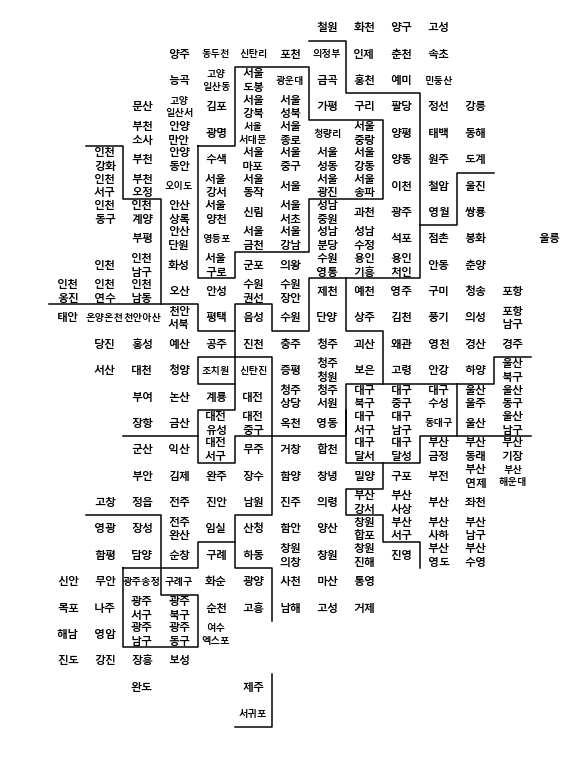

In [13]:
plt.figure(figsize=(8, 11))

# 지역 이름 표시
for idx, row in draw_korea.iterrows():
    
    # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시한다. 
    # (중구, 서구)
    if len(row['ID'].split())==2:
        dispname = '{}\n{}'.format(row['ID'].split()[0], row['ID'].split()[1])
    elif row['ID'][:2]=='고성':
        dispname = '고성'
    else:
        dispname = row['ID']

    # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시한다.
    if len(dispname.splitlines()[-1]) >= 3:
        fontsize, linespacing = 9.5, 1.5
    else:
        fontsize, linespacing = 11, 1.2

    plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                 fontsize=fontsize, ha='center', va='center', 
                 linespacing=linespacing)
    
# 시도 경계 그린다.
for path in BORDER_LINES:
    ys, xs = zip(*path)
    plt.plot(xs, ys, c='black', lw=1.5)

plt.gca().invert_yaxis()
#plt.gca().set_aspect(1)

plt.axis('off')

plt.tight_layout()
plt.show()

In [14]:
raw_data = pd.merge( draw_korea,raw_data, how='outer', on=['ID'])
raw_data.fillna(0, inplace=True)
raw_data.head()

,y,x,ID,서울,영등포,수원,평택,천안아산,조치원,신탄진,...,하동,광양,보성,화순,광명,울산,포항,탑승,하차,탑승-하차
0,0.0,7.0,철원,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,8.0,화천,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,9.0,양구,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,10.0,고성(강원),0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,3.0,양주,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


* 이제 위 raw_data 데이터에서 지도에 표현하고자 하는 데이터가 **탑승**이라면 이 값들이 아까 만든 각 해당 기차역에 위치하면 된다.

In [15]:
mapdata = raw_data.pivot_table(index='y', columns='x', values='탑승')
masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)

* 지도로 시각화 하기 위한 함수를 만든다

In [16]:
def drawKorea(targetData, blockedMap, cmapname):
    gamma = 0.75

    whitelabelmin = (max(blockedMap[targetData]) - 
                                     min(blockedMap[targetData]))*0.25 + \
                                                                min(blockedMap[targetData])

    datalabel = targetData

    vmin = min(blockedMap[blockedMap[targetData]>0][targetData])
    vmax = max(blockedMap[targetData])

    mapdata = blockedMap.pivot_table(index='y', columns='x', values=targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
    
    plt.figure(figsize=(9, 11))
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=cmapname, 
               edgecolor='#aaaaaa', linewidth=0.5)

    # 지역 이름 표시
    for idx, row in blockedMap.iterrows():
        # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시한다. 
        #(중구, 서구)
        if len(row['ID'].split())==2:
            dispname = '{}\n{}'.format(row['ID'].split()[0], row['ID'].split()[1])
        elif row['ID'][:2]=='고성':
            dispname = '고성'
        else:
            dispname = row['ID']

        # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시한다.
        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 10.0, 1.1
        else:
            fontsize, linespacing = 11, 1.

        annocolor = 'white' if row[targetData] > whitelabelmin else 'black'
        plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                     fontsize=fontsize, ha='center', va='center', color=annocolor,
                     linespacing=linespacing)

    # 시도 경계 그린다.
    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c='black', lw=2)

    plt.gca().invert_yaxis()

    plt.axis('off')

    cb = plt.colorbar(shrink=.1, aspect=10)
    cb.set_label(datalabel)

    plt.tight_layout()
    plt.show()

## 데이터 시각화

### 전체 기차역 탑승량 비교

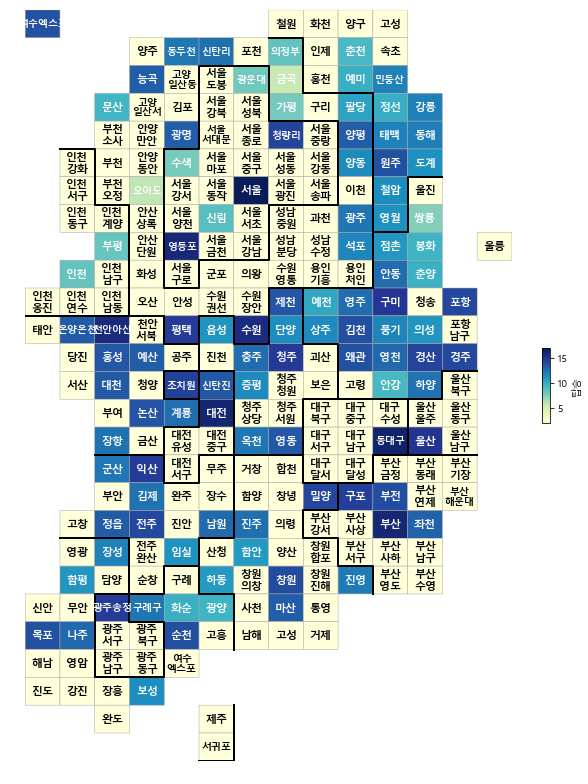

In [17]:
drawKorea('탑승', raw_data, 'YlGnBu')

* 각 **광역시, 도 별 주요 거점 역**들이 존재하여 그 역을 기준으로 주위 역의 이용이 높고 전체적으로 **서울, 부산, 대구, 대전 등 광역시**의 이용량이 높고 인구수 대비 **강원도 지역**의 수송량또한 전반적으로 많은 편으로 보인다. 

### 전체 기차역 하차량 비교

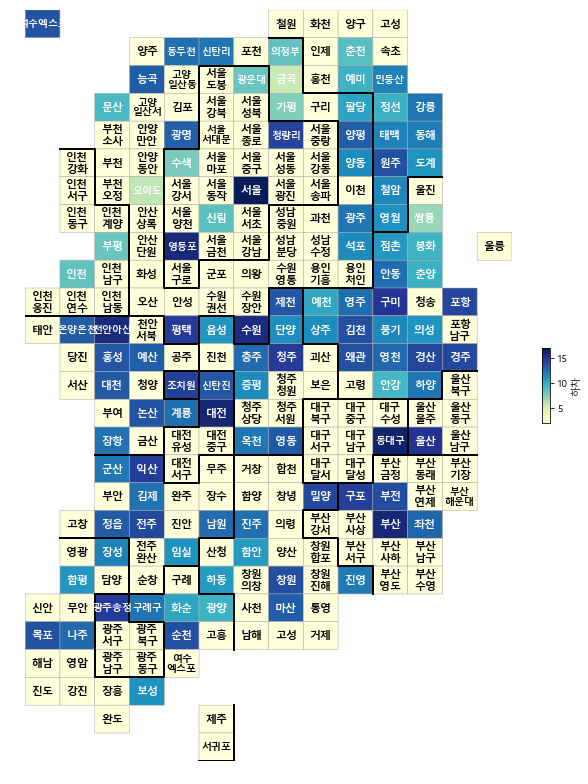

In [18]:
drawKorea('하차', raw_data, 'YlGnBu')

* 승차량과 하차량이 거의 비슷하다는 것을 알 수 있다. 따라서 코레일에서 **기차표를 판매할때 왕복권을 할인하여 파는 것과 같은 마케팅**을 한다면 소비자들의 니즈를 더 충족 시킬 수 있을 것이다.

### 주요 거점 역별 출발지 비교

#### 1. 서울

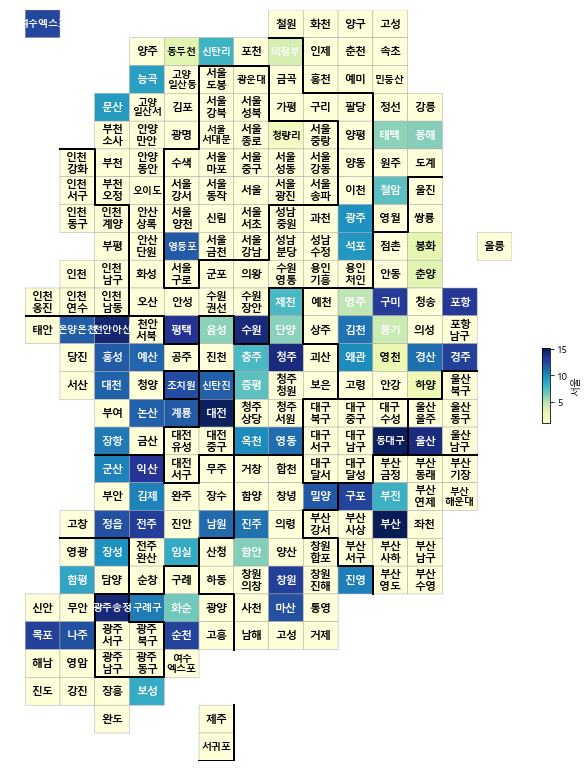

In [19]:
drawKorea('서울', raw_data, 'YlGnBu')

#### 2. 부산

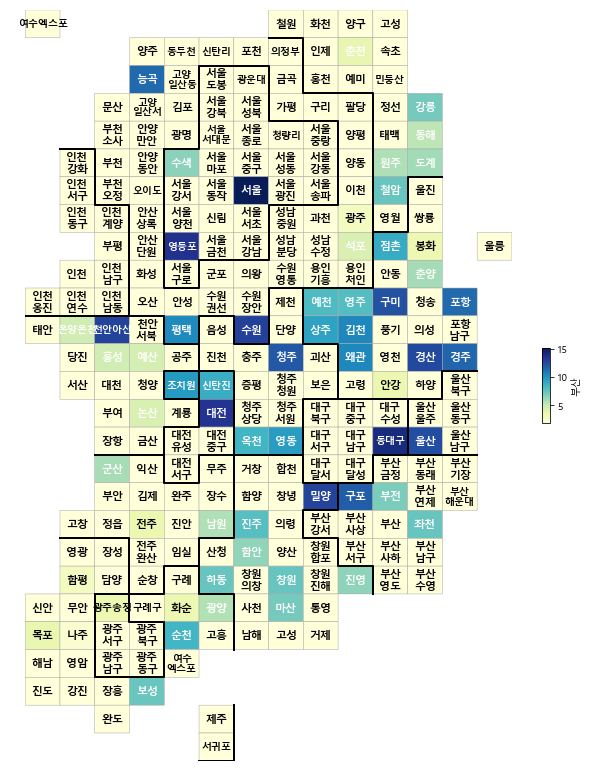

In [20]:
drawKorea('부산', raw_data, 'YlGnBu')

#### 3. 광주

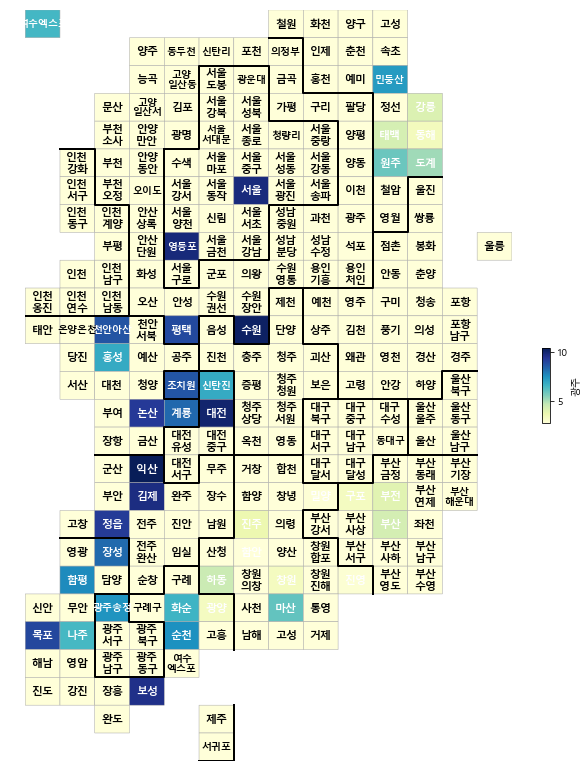

In [21]:
drawKorea('광주', raw_data, 'YlGnBu')

#### 4. 인천

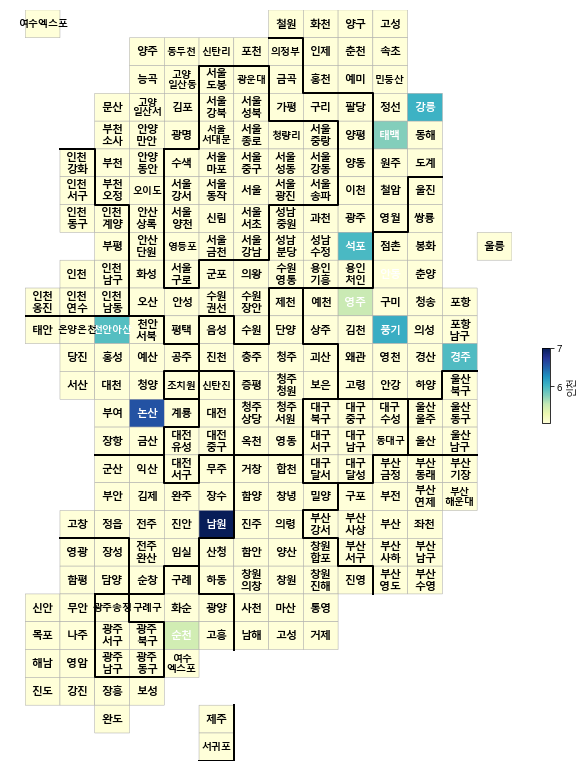

In [22]:
drawKorea('인천', raw_data, 'YlGnBu')

#### 5. 대전

In [ ]:
drawKorea('대전', raw_data, 'YlGnBu')

## 결론

#### 위의 자료를 이용하여 우리 지역에 많이 오는 지역을 조사하여 해당 지역와 같이 마케팅을 하면 더 큰 이율을 창출 할 수 있을 것이다.